In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#seaborn 数据可视化的

import warnings 
#警告


%matplotlib inline
#识别中文字体
plt.rcParams['font.family'] = 'SimHei'
#忽略警告
warnings.filterwarnings('ignore')

In [2]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
无缺失值

In [8]:
#查看葡萄酒质量分布情况
score = df.groupby("quality").agg({"fixed acidity":lambda x:len(x)})
score= score.reset_index()
#groupby是行操作， agg是基于列操作
score

,quality,fixed acidity
0,3,10.0
1,4,53.0
2,5,681.0
3,6,638.0
4,7,199.0
5,8,18.0


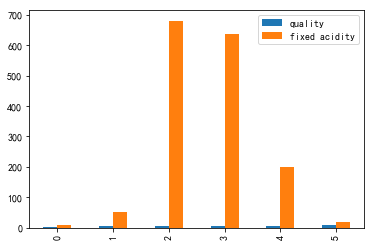

In [11]:
score.plot(kind="bar")

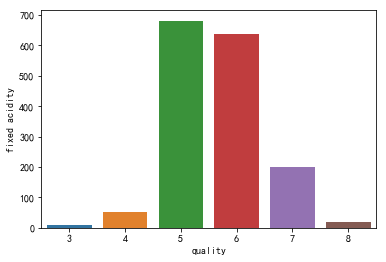

In [10]:
sns.barplot(x="quality", y = "fixed acidity", data=score)

In [ ]:
将6分的以上红酒 定位高质量的红酒
将6分以下的红酒定位  低质量的红酒



分类：  高质量    低质量

In [12]:
def fun(x):
    if x >= 6:
        return 1
    else:
        return 0

In [13]:
df["GoodWine"] = df["quality"].map(fun)

In [14]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,GoodWine
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
GoodWine                1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [16]:
df.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [18]:
#数据集
x = np.array(df[df.columns[:11]])
x.shape

(1599, 11)

In [19]:
#目标值
y = np.array(df[df.columns[12]])
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [25]:
https://www.cnblogs.com/bjwu/p/8977141.html

SyntaxError: invalid syntax (<ipython-input-25-195b2f3e0048>, line 1)

In [26]:
x_train
#归一化？两个属性之间差别大的话使用归一化
#标准化？  一列数据的最大值和最小值差别过大的话，使用标准化   以0位基数  1为标准差的正太分布的数据

array([[ 7.9 ,  0.69,  0.21, ...,  3.25,  0.51,  9.9 ],
       [ 8.5 ,  0.37,  0.32, ...,  3.38,  0.72, 11.8 ],
       [10.7 ,  0.52,  0.38, ...,  3.15,  0.79, 12.1 ],
       ...,
       [ 9.  ,  0.4 ,  0.43, ...,  3.2 ,  0.6 , 12.2 ],
       [ 6.7 ,  0.67,  0.02, ...,  3.39,  0.82, 10.9 ],
       [ 6.9 ,  0.56,  0.03, ...,  3.53,  0.57, 10.6 ]])

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#标准化
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [29]:
x_train

array([[0.27272727, 0.39041096, 0.26582278, ..., 0.33333333, 0.08695652,
        0.23076923],
       [0.32727273, 0.17123288, 0.40506329, ..., 0.44736842, 0.2173913 ,
        0.52307692],
       [0.52727273, 0.2739726 , 0.48101266, ..., 0.24561404, 0.26086957,
        0.56923077],
       ...,
       [0.37272727, 0.19178082, 0.5443038 , ..., 0.28947368, 0.14285714,
        0.58461538],
       [0.16363636, 0.37671233, 0.02531646, ..., 0.45614035, 0.27950311,
        0.38461538],
       [0.18181818, 0.30136986, 0.03797468, ..., 0.57894737, 0.1242236 ,
        0.33846154]])

In [30]:
#建模训练数据
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)
clf.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
round(clf.score(x_train, y_train) * 100, 2)

85.34

In [ ]:
https://blog.csdn.net/qq_36523839/article/details/80707678

In [36]:
#交叉验证（新知识点面试问）
#交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
#2：还可以从有限的数据中获取尽可能多的有效信息。
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train,cv=10)
score = scores.mean()
round(score*100, 2)

70.06

In [38]:
#选择最优的k
ks = range(1,100)d
inSampleScores = []
crossValidationScores = []
d = {}
for k in ks:
    clf = KNeighborsClassifier(k).fit(x_train, y_train)
    inSampleScores.append(clf.score(x_train, y_train))
    scores = cross_val_score(clf, x_train, y_train,cv=5)
    crossValidationScores.append(scores.mean())
    d[k] = scores.mean()
    

In [39]:
d

{1: 0.7230020819987188,
 2: 0.6738068545803972,
 3: 0.6988268737988469,
 4: 0.6917000320307495,
 5: 0.709581197950032,
 6: 0.7113749199231262,
 7: 0.7167120435618194,
 8: 0.7203074951953876,
 9: 0.7185297885970532,
 10: 0.7274463484945548,
 11: 0.7283552210121718,
 12: 0.7408552210121717,
 13: 0.7399623638693145,
 14: 0.7328074951953877,
 15: 0.7247717809096732,
 16: 0.7256526265214606,
 17: 0.7292320627802691,
 18: 0.7220651825752722,
 19: 0.7140334721332479,
 20: 0.7292160474055092,
 21: 0.7211923446508648,
 22: 0.7238669122357464,
 23: 0.7185257847533633,
 24: 0.722077194106342,
 25: 0.7220651825752723,
 26: 0.7220491672005125,
 27: 0.7176008968609866,
 28: 0.7247517616912236,
 29: 0.7247557655349135,
 30: 0.722073190262652,
 31: 0.7211683215887252,
 32: 0.7220651825752723,
 33: 0.7238629083920564,
 34: 0.7256406149903907,
 35: 0.7274263292761051,
 36: 0.7265334721332478,
 37: 0.726521460602178,
 38: 0.7256245996156311,
 39: 0.7283191864189622,
 40: 0.7310017616912237,
 41: 0.725644

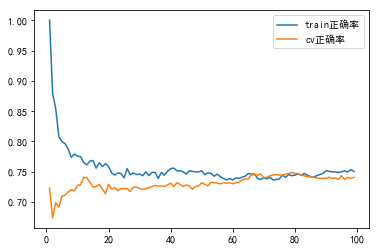

In [40]:
p1 = plt.plot(ks, inSampleScores)
p2 = plt.plot(ks, crossValidationScores)
plt.legend(["train正确率", "cv正确率"])


In [41]:
d.items()

dict_items([(1, 0.7230020819987188), (2, 0.6738068545803972), (3, 0.6988268737988469), (4, 0.6917000320307495), (5, 0.709581197950032), (6, 0.7113749199231262), (7, 0.7167120435618194), (8, 0.7203074951953876), (9, 0.7185297885970532), (10, 0.7274463484945548), (11, 0.7283552210121718), (12, 0.7408552210121717), (13, 0.7399623638693145), (14, 0.7328074951953877), (15, 0.7247717809096732), (16, 0.7256526265214606), (17, 0.7292320627802691), (18, 0.7220651825752722), (19, 0.7140334721332479), (20, 0.7292160474055092), (21, 0.7211923446508648), (22, 0.7238669122357464), (23, 0.7185257847533633), (24, 0.722077194106342), (25, 0.7220651825752723), (26, 0.7220491672005125), (27, 0.7176008968609866), (28, 0.7247517616912236), (29, 0.7247557655349135), (30, 0.722073190262652), (31, 0.7211683215887252), (32, 0.7220651825752723), (33, 0.7238629083920564), (34, 0.7256406149903907), (35, 0.7274263292761051), (36, 0.7265334721332478), (37, 0.726521460602178), (38, 0.7256245996156311), (39, 0.728319

In [45]:
best_k = sorted(d.items(), key=lambda x:x[1], reverse=True)[0][0]
best_k

79

In [46]:
clf = KNeighborsClassifier(best_k).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)
round(clf.score(x_test, y_test)*100, 2)



73.75

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.74      0.68      0.71       225
          1       0.74      0.79      0.76       255

avg / total       0.74      0.74      0.74       480



In [49]:
from sklearn.linear_model import LogisticRegression, LinearRegression


In [50]:
logic = LogisticRegression().fit(x_train, y_train)
logic.score(x_test, y_test)


0.7229166666666667

In [ ]:
作业：https://github.com/haluowan/house-price-pridict/blob/master/linear%20regression_sklearn.ipynb

In [ ]:
https://github.com/arunavedula/Heart.csv/blob/master/Heart.csv.ipynb